In [12]:
import os 
from agents import Agent, Runner, ModelSettings,trace
from helpers.helper_agents import recommender_agent, responsive_agent,query_rewrite, travel_info_agent
from helpers.travel_agents import f_agent, h_agent
from helpers.function_tools import flight_search_2, hotels_search2
from helpers.helper_functions import assemble_conversation
from agents.extensions.visualization import draw_graph
import nest_asyncio
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.environ['OPENAI_API_KEY_MALI']
nest_asyncio.apply()


In [13]:
travel_info_agent.tools = [
        f_agent.as_tool(
            tool_name = "Flight_Assistant_agent", 
            tool_description="Arranges flight ticket according to user needs"
        ),
        h_agent.as_tool(
            tool_name = "Hotels_Assistant_agent", 
            tool_description="Arranges hotel accomodations according to user needs"
        ),
]

In [14]:
query_rewrite.handoffs = [travel_info_agent,recommender_agent]

In [15]:
ank = "ankara(ESB)"
ist = "istanbul(SAW)"
amst = "amsterdam(AMS)"
pekin = "Peking(PEK)"

start_point = ank 
dest_point = amst



query_1 = f"""I want to travel from {start_point} to {dest_point}. 
The outbound date is 2025-05-05 and the return date will be 2025-05-11. 
tell me the cheapest travel and hotels options in Amsterdam.
""".strip()

In [16]:
with trace("travel"): 
    res = Runner.run_sync(query_rewrite,query_1)

In [17]:
print(res.final_output)

It looks like I still need a few details to assist you better. Please provide the following:

- Starting point (you mentioned Ankara, but please confirm if it's Ankara (ESB)).
- Accommodation preferences (e.g., hostels, hotels, camping).

Once I have this information, I can help you find the cheapest travel and hotel options in Amsterdam!


In [18]:
with trace("travel"): 
    new_input = "what is the total price for the cheapest option"
    input = assemble_conversation(res,new_input)
    res = Runner.run_sync(query_rewrite,input)
    print(res.final_output)

### Total Costs for Your Trip

#### Flights
- **Total Price:** $487  
- **Flight Details:**
  - **Outbound:** Ankara (ESB) to Amsterdam (AMS) via Dalaman (DLM) and Manchester (MAN)
  - **Return Date:** 2025-05-11

#### Hotels
1. **via Amsterdam**
   - **Price per Night:** $93
   - **Total for 6 Nights:** $558

### Grand Total
- **Flights:** $487
- **Hotels:** $558
- **Total Cost:** **$1,045**

If you would like to proceed with bookings or need more options, just let me know!


In [19]:
with trace("travel"): 
    new_input = "Please calculate the total price for the whole trip"
    input = assemble_conversation(res,new_input)
    res = Runner.run_sync(query_rewrite,input)
    print(res.final_output)

### Total Price Calculation for Your Trip

#### Flights
- **Total Price for Flights:** $487

#### Hotels
1. **via Amsterdam**
   - **Price per Night:** $93
   - **Total for 6 Nights:** $93 x 6 = $558

### Grand Total
- **Flights:** $487
- **Hotels:** $558
- **Total Cost:** 
  - **$487 (Flights) + $558 (Hotels) = $1,045**

### Summary
- **Total Cost for the Whole Trip:** **$1,045**

If you need further assistance or wish to make bookings, feel free to ask!


In [20]:
with trace("travel"): 
    new_input = "I have changed my mind, I want to go london"
    input = assemble_conversation(res,new_input)
    res = Runner.run_sync(query_rewrite,input)
    print(res.final_output)

Here are the subquestions to gather all necessary information for your new travel plans to London:

1. What is your preferred mode of transportation for the trip from Ankara (ESB) to London (LON)? (e.g., direct flights, connecting flights, etc.)
2. What is your budget range for flights from Ankara to London?
3. What type of accommodation are you looking for in London? (e.g., budget hotels, mid-range hotels, hostels, etc.)
4. What is your budget range for hotels in London per night?
5. Are there any specific areas in London where you would prefer to stay? (e.g., city center, near attractions, etc.)
6. Do you have any preferences for hotel amenities? (e.g., free Wi-Fi, breakfast included, etc.)
7. Would you like recommendations for activities or attractions to visit while in London?

Once I have this information, I can help you find the cheapest travel and hotel options in London!


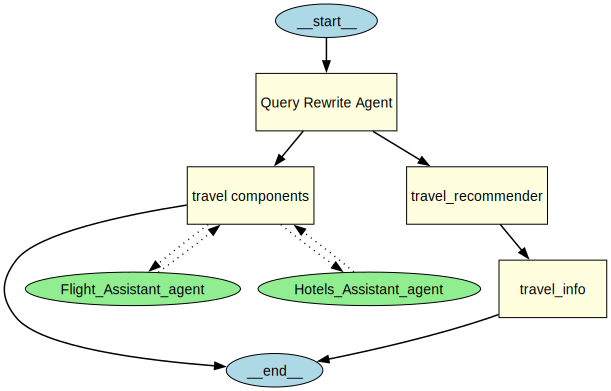

In [21]:
draw_graph(query_rewrite)